In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Create directed graph
G = nx.DiGraph()

In [3]:
# Add nodes (countries) - Corrected node addition
G.add_node("Russie", population=144_000_000, pib=1.5)
G.add_node("Inde", population=1_400_000_000, pib=2.8)
G.add_node("Allemagne", population=83_000_000, pib=3.8)
G.add_node("États-Unis", population=331_000_000, pib=21.4)

# Add edges (relationships)
G.add_edge("Russie", "Inde", type="commerce", intensite=85)
G.add_edge("Inde", "Allemagne", type="diplomatique", intensite=70)
G.add_edge("Russie", "Allemagne", type="sanctions", intensite=-90)
G.add_edge("Russie", "États-Unis", type="militaire", intensite=-50)

# Set up colors based on relationship type
color_map = {
    "commerce": "green",
    "diplomatique": "blue",
    "sanctions": "red",
    "militaire": "orange"
}

# Get edge colors and widths based on type and intensity
edge_colors = [color_map[G.edges[edge]["type"]] for edge in G.edges()]
edge_widths = [abs(G.edges[edge]["intensite"]) / 10 for edge in G.edges()]

{('Russie',
  'Inde'): Text(0.21809860353405341, -0.17074500347632626, 'commerce\n(85)'),
 ('Russie',
  'Allemagne'): Text(-0.07230745571623615, -0.282111355861024, 'sanctions\n(-90)'),
 ('Russie',
  'États-Unis'): Text(-0.1798357269320588, 0.5471362804957789, 'militaire\n(-50)'),
 ('Inde',
  'Allemagne'): Text(0.17983709272764659, -0.5471349817117649, 'diplomatique\n(70)')}

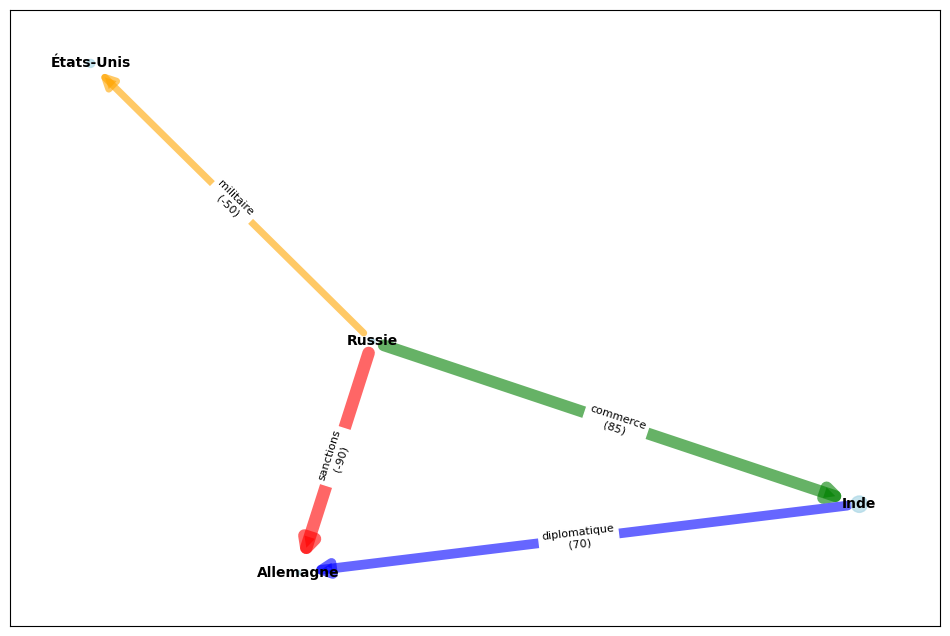

In [4]:
# Layout and visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1, seed=42)

# Draw nodes - Fixed node size calculation
node_sizes = [G.nodes[node]['population']/10_000_000 for node in G.nodes()]

# Draw nodes
nx.draw_networkx_nodes(G, pos, 
                      node_color='lightblue',
                      node_size=node_sizes,
                      alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos, 
                      edge_color=edge_colors,
                      width=edge_widths,
                      arrowsize=20,
                      alpha=0.6)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add edge labels with type and intensity
edge_labels = {(u, v): f"{d['type']}\n({d['intensite']})" 
              for (u, v, d) in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

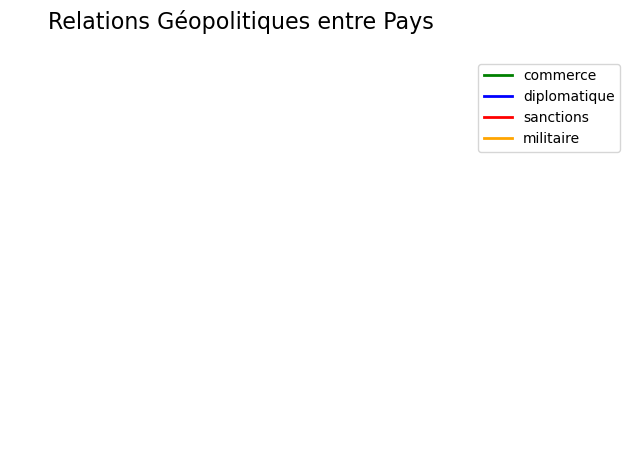

In [5]:
# Customize plot
plt.title("Relations Géopolitiques entre Pays", fontsize=16, pad=20)
plt.axis('off')

# Add legend
legend_elements = [plt.Line2D([0], [0], color=color, label=rel_type, linewidth=2)
                  for rel_type, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()